In [5]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import psycopg  # psycopg v3 driver
import matplotlib.pyplot as plt
from IPython.display import display


In [7]:
display(q("SELECT COUNT(*) AS properties FROM properties;"))
display(q("SELECT COUNT(*) AS leads FROM leads;"))
display(q("SELECT COUNT(*) AS transactions FROM transactions;"))


,properties
0,20


,leads
0,20


,transactions
0,10


In [8]:
df1 = q("""
SELECT p.city, COUNT(t.transaction_id) AS num_sales
FROM transactions t
JOIN properties p ON t.property_id = p.property_id
GROUP BY p.city
ORDER BY num_sales DESC
LIMIT 3;
""")
display(df1)   # pretty table in the notebook
df1            # keep this as the last line to render as a grid


,city,num_sales
0,Fort Worth,4
1,Dallas,2
2,Austin,2


,city,num_sales
0,Fort Worth,4
1,Dallas,2
2,Austin,2


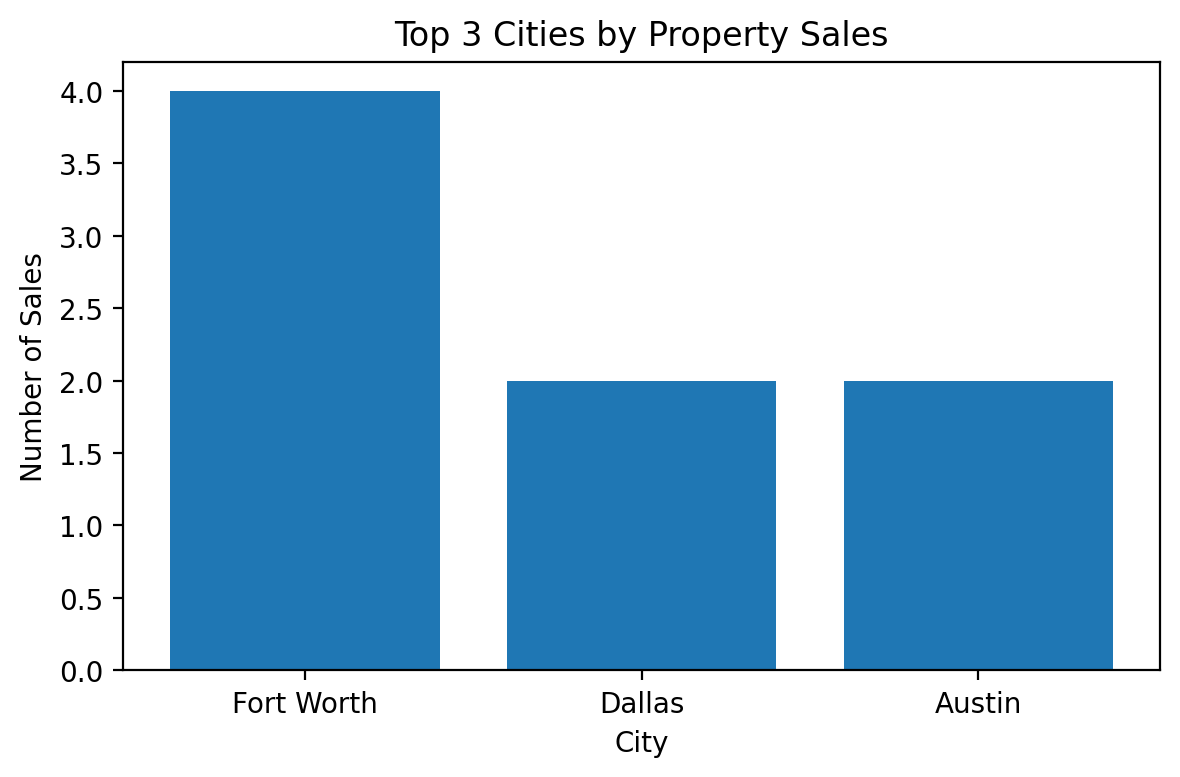

In [9]:
plt.figure(figsize=(6,4))
plt.bar(df1["city"], df1["num_sales"])
plt.xlabel("City")
plt.ylabel("Number of Sales")
plt.title("Top 3 Cities by Property Sales")
plt.tight_layout()
plt.show()


In [10]:
df2 = q("""
SELECT a.full_name, SUM(t.sale_price) AS total_sales, COUNT(*) AS deals
FROM agents a
JOIN transactions t ON t.agent_id = a.agent_id
GROUP BY a.full_name
ORDER BY total_sales DESC
LIMIT 5;
""")
display(df2)
df2


,full_name,total_sales,deals
0,Agent 4,2910640.00,5
1,Agent 2,1949704.00,3
2,Agent 1,970040.00,2


,full_name,total_sales,deals
0,Agent 4,2910640.00,5
1,Agent 2,1949704.00,3
2,Agent 1,970040.00,2


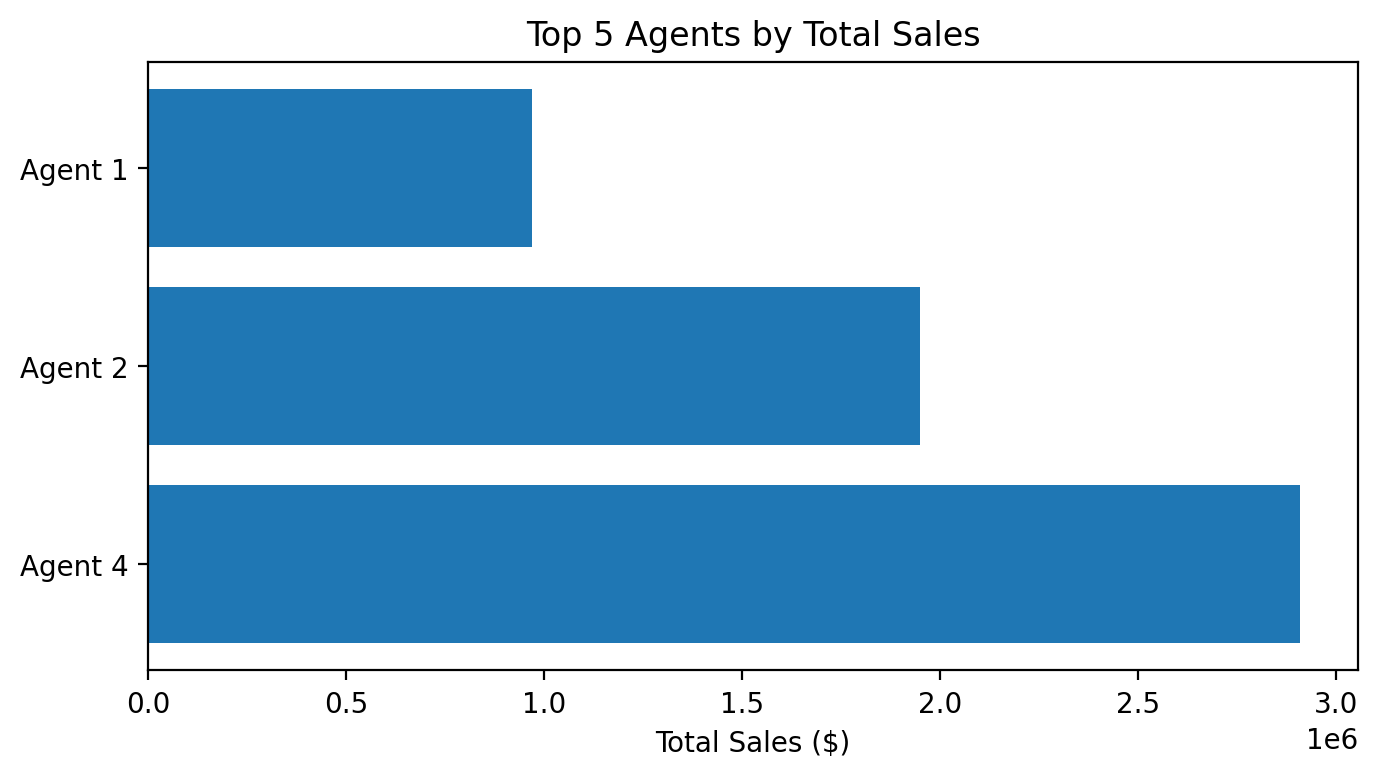

In [11]:
plt.figure(figsize=(7,4))
plt.barh(df2["full_name"], df2["total_sales"])
plt.xlabel("Total Sales ($)")
plt.title("Top 5 Agents by Total Sales")
plt.tight_layout()
plt.show()


In [12]:
df3 = q("""
SELECT DATE_TRUNC('month', close_date) AS month, SUM(sale_price) AS total_sales
FROM transactions
GROUP BY month
ORDER BY month;
""")
display(df3)
df3


,month,total_sales
0,2023-11-01 00:00:00-05:00,727057.00
1,2023-12-01 00:00:00-06:00,576833.00
2,2024-02-01 00:00:00-06:00,570521.00
3,2024-03-01 00:00:00-06:00,851474.00
4,2024-04-01 00:00:00-05:00,442075.00
5,2024-08-01 00:00:00-05:00,397861.00
6,2024-09-01 00:00:00-05:00,943602.00
7,2024-10-01 00:00:00-05:00,748782.00
8,2025-06-01 00:00:00-05:00,572179.00


,month,total_sales
0,2023-11-01 00:00:00-05:00,727057.00
1,2023-12-01 00:00:00-06:00,576833.00
2,2024-02-01 00:00:00-06:00,570521.00
3,2024-03-01 00:00:00-06:00,851474.00
4,2024-04-01 00:00:00-05:00,442075.00
5,2024-08-01 00:00:00-05:00,397861.00
6,2024-09-01 00:00:00-05:00,943602.00
7,2024-10-01 00:00:00-05:00,748782.00
8,2025-06-01 00:00:00-05:00,572179.00


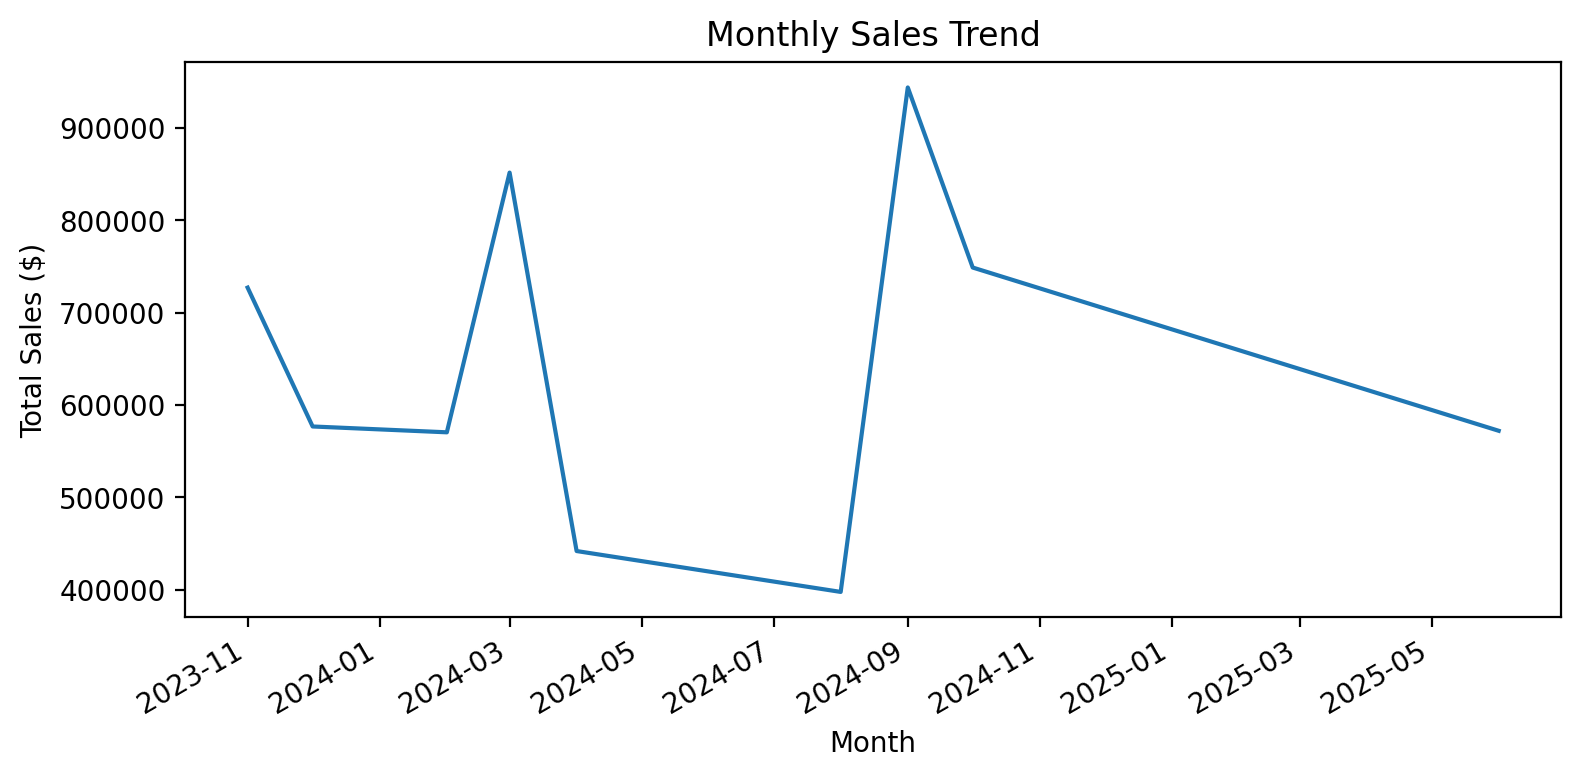

In [13]:
plt.figure(figsize=(8,4))
plt.plot(df3["month"], df3["total_sales"])
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [14]:
conn.close()


In [6]:
conn = psycopg.connect(
    dbname="realestate",
    user="postgres",
    password="adam1996$",
    host="localhost",
    port="5432"
)

# helper: run SQL and return a DataFrame
def q(sql: str) -> pd.DataFrame:
    with conn.cursor() as cur:
        cur.execute(sql)
        cols = [d[0] for d in cur.description]
        rows = cur.fetchall()
    return pd.DataFrame(rows, columns=cols)


In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# --- DB connection ---
conn = psycopg2.connect(
    dbname="realestate",
    user="postgres",
    password="YOUR_POSTGRES_PASSWORD",  # replace with your real password
    host="localhost",
    port="5432"
)

# Helper function: run SQL -> DataFrame
def q(sql):
    return pd.read_sql_query(sql, conn)

# --- Top 5 Agents by Sales ---
df = q("""
    SELECT
        a.full_name AS agent_name,
        SUM(t.sale_price) AS total_sales
    FROM agents a
    JOIN transactions t
      ON a.agent_id = t.agent_id
    GROUP BY a.full_name
    ORDER BY total_sales DESC
    LIMIT 5;
""")

# --- Plot ---
plt.figure(figsize=(8,5))
plt.bar(df["agent_name"], df["total_sales"], color="teal")
plt.xlabel("Agent")
plt.ylabel("Total Sales ($)")
plt.title("Top 5 Agents by Total Sales")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

OperationalError: connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "postgres"


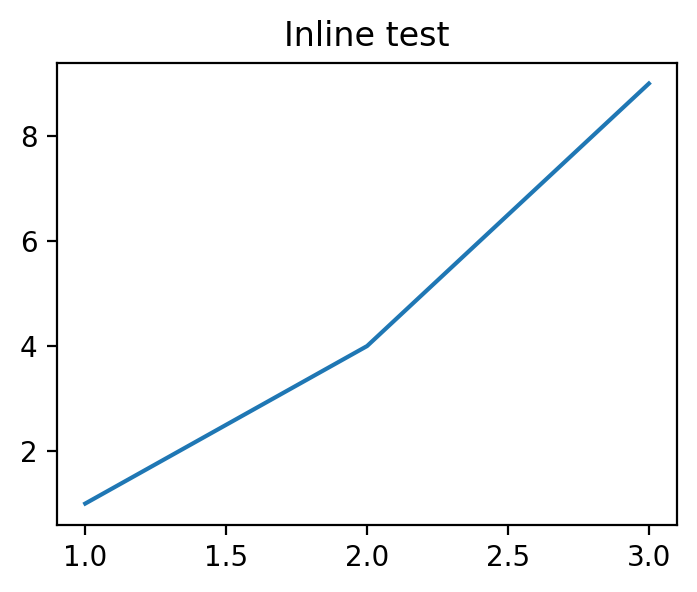

In [ ]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.plot([1,2,3], [1,4,9])
plt.title("Inline test")
plt.show()


In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    dbname="realestate",
    user="postgres",
    password="adam1996$",   # your actual password
    host="localhost",
    port="5432"
)


In [ ]:
sql = """
SELECT a.full_name, SUM(t.sale_price) AS total_sales
FROM agents a
JOIN transactions t ON a.agent_id = t.agent_id
GROUP BY a.full_name
ORDER BY total_sales DESC
LIMIT 5;
"""
df = pd.read_sql(sql, conn)
df


In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df["full_name"], df["total_sales"], color="teal")
plt.xlabel("Agent")
plt.ylabel("Total Sales ($)")
plt.title("Top 5 Agents by Total Sales")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

In [15]:
# converter.py
import sys, re
from pathlib import Path
import sqlglot
from sqlglot.dialects.dialect import Dialect

# --- helpers ---------------------------------------------------------------

def split_batches(sql_text: str) -> list[str]:
    """Split on GO batch separators (MSSQL)."""
    parts = re.split(r"(?im)^\s*GO\s*;?\s*$", sql_text)
    return [p.strip() for p in parts if p.strip()]

def normalize_whitespace(sql: str) -> str:
    sql = re.sub(r"[ \t]+", " ", sql)
    sql = re.sub(r"\n{3,}", "\n\n", sql)
    return sql.strip()

def post_process_snowflake(sql: str) -> str:
    """
    Extra tweaks after sqlglot to match Snowflake conventions.
    Only text replacements that are safe/obvious are applied here.
    """
    # [] identifiers -> "ident"
    sql = re.sub(r"\[([^\]]+)\]", r'"\1"', sql)

    # ISNULL(col, x) -> COALESCE(col, x)
    sql = re.sub(r"(?i)\bISNULL\s*\(", "COALESCE(", sql)
